# Training SVM model to detect spam texts

There are 5846 rows and 3 columns
ham     4510
spam    1336
Name: Category, dtype: int64


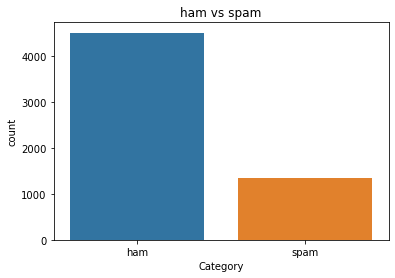

                                             Message  Label
0  go jurong point crazi avail bugi n great world...      0
1                              ok lar joke wif u oni      0
3                u dun say earli hor u c alreadi say      0
4               nah think goe usf live around though      0
6      even brother like speak treat like aid patent      0
X_train: (4676,)


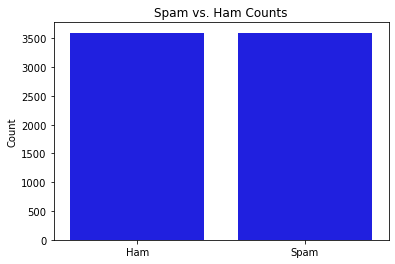

In [1]:
from utils import get_cleaned_data, generate_model_output
X_train, X_test, y_train, y_test, vocab_size, sentence_len = get_cleaned_data()

In [2]:
# Import StandardScaler
from sklearn.preprocessing import StandardScaler

# Create a StandardScaler object
scaler = StandardScaler()

# Fit the StandardScaler object to the data
scaler.fit(X_train)

# Transform the data using the scaler
X_train = scaler.transform(X_train)

In [3]:
# train our model
from sklearn.svm import SVC

clf = SVC(class_weight="balanced", kernel='poly', degree=7)
clf.fit(X_train, y_train)

# test our model
y_pred = clf.predict(X_test)

Classification Report
               precision    recall  f1-score   support

           0       0.79      0.99      0.88       911
           1       0.72      0.10      0.18       259

    accuracy                           0.79      1170
   macro avg       0.76      0.54      0.53      1170
weighted avg       0.78      0.79      0.73      1170
 

Accuracy Score: 0.7923076923076923


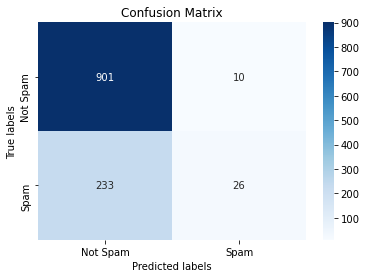

In [4]:
# evaluate our model
generate_model_output(y_test, y_pred)

In [5]:
# Cross Validation of the SVM
from sklearn.model_selection import cross_val_score
scores = cross_val_score(clf, X_train, y_train, scoring="precision")

print("Precision: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Precision: 0.52 (+/- 0.05)
